In [1]:
!pip install pandas numpy matplotlib yfinance PyPortfolioOpt
import os
if not os.path.isdir('data'):
    os.system('git clone https://github.com/robertmartin8/PyPortfolioOpt.git')
    os.chdir('PyPortfolioOpt/cookbook')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 191 kB/s 
     |████████████████████████████████| 62 kB 584 kB/s 
     |████████████████████████████████| 17.1 MB 56 kB/s 
     |████████████████████████████████| 16.9 MB 463 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
tickers = ['BBCA.JK',"BMRI.JK","BBRI.JK","TLKM.JK", "BYAN.JK", "TLKM.JK", "ASII.JK", "TPIA.JK", "BBNI.JK", "UNVR.JK", "ICBP.JK"]

In [4]:
ohlc = yf.download(tickers, start="2020-01-01", end="2022-12-09",  interval = "1d")
prices = ohlc["Close"]
prices.tail()

[*********************100%***********************]  10 of 10 completed


,ASII.JK,BBCA.JK,BBNI.JK,BBRI.JK,BMRI.JK,BYAN.JK,ICBP.JK,TLKM.JK,TPIA.JK,UNVR.JK
Date,,,,,,,,,,
2022-12-02,6125.0,8900.0,9750.0,4890.0,10525.0,11325.0,10200.0,4000.0,2380.0,4710.0
2022-12-05,6025.0,8775.0,9750.0,4890.0,10875.0,13575.0,10350.0,3840.0,2330.0,4740.0
2022-12-06,5875.0,8675.0,9550.0,4860.0,10900.0,14625.0,10350.0,3600.0,2340.0,4740.0
2022-12-07,5725.0,8450.0,9500.0,4760.0,10375.0,15225.0,10325.0,3680.0,2360.0,4700.0
2022-12-08,5675.0,8500.0,9500.0,4840.0,10050.0,14550.0,10200.0,3740.0,2340.0,4660.0


In [5]:
mcaps = {}
for t in tickers:
    stock = yf.Ticker(t)
    mcaps[t] = stock.info["marketCap"]
mcaps

{'BBCA.JK': 1057083122253824,
 'BMRI.JK': 463166991499264,
 'BBRI.JK': 726739202342912,
 'TLKM.JK': 361577022750720,
 'BYAN.JK': 451666209931264,
 'ASII.JK': 229744427663360,
 'TPIA.JK': 203302025297920,
 'BBNI.JK': 177859192684544,
 'UNVR.JK': 176253009133568,
 'ICBP.JK': 117710566457344}

In [6]:
prices

,ASII.JK,BBCA.JK,BBNI.JK,BBRI.JK,BMRI.JK,BYAN.JK,ICBP.JK,TLKM.JK,TPIA.JK,UNVR.JK
Date,,,,,,,,,,
2020-01-02,6875.0,6690.0,7775.0,4410.0,7750.0,1590.0,11150.0,3910.0,2568.75,8550.0
2020-01-03,6950.0,6800.0,7800.0,4420.0,7725.0,1555.0,11250.0,3980.0,2568.75,8575.0
2020-01-06,6750.0,6735.0,7625.0,4370.0,7600.0,1555.0,11500.0,3960.0,2437.50,8475.0
2020-01-07,6775.0,6740.0,7550.0,4400.0,7600.0,1555.0,11500.0,3940.0,2406.25,8450.0
2020-01-08,6775.0,6680.0,7425.0,4380.0,7500.0,1555.0,11550.0,3900.0,2325.00,8325.0
...,...,...,...,...,...,...,...,...,...,...
2022-12-02,6125.0,8900.0,9750.0,4890.0,10525.0,11325.0,10200.0,4000.0,2380.00,4710.0
2022-12-05,6025.0,8775.0,9750.0,4890.0,10875.0,13575.0,10350.0,3840.0,2330.00,4740.0
2022-12-06,5875.0,8675.0,9550.0,4860.0,10900.0,14625.0,10350.0,3600.0,2340.00,4740.0


In [7]:
df = pd.DataFrame(prices)

In [8]:
df.to_excel('data.xlsx')

# KS test

In [9]:
from scipy.stats import kstest

In [10]:
df

,ASII.JK,BBCA.JK,BBNI.JK,BBRI.JK,BMRI.JK,BYAN.JK,ICBP.JK,TLKM.JK,TPIA.JK,UNVR.JK
Date,,,,,,,,,,
2020-01-02,6875.0,6690.0,7775.0,4410.0,7750.0,1590.0,11150.0,3910.0,2568.75,8550.0
2020-01-03,6950.0,6800.0,7800.0,4420.0,7725.0,1555.0,11250.0,3980.0,2568.75,8575.0
2020-01-06,6750.0,6735.0,7625.0,4370.0,7600.0,1555.0,11500.0,3960.0,2437.50,8475.0
2020-01-07,6775.0,6740.0,7550.0,4400.0,7600.0,1555.0,11500.0,3940.0,2406.25,8450.0
2020-01-08,6775.0,6680.0,7425.0,4380.0,7500.0,1555.0,11550.0,3900.0,2325.00,8325.0
...,...,...,...,...,...,...,...,...,...,...
2022-12-02,6125.0,8900.0,9750.0,4890.0,10525.0,11325.0,10200.0,4000.0,2380.00,4710.0
2022-12-05,6025.0,8775.0,9750.0,4890.0,10875.0,13575.0,10350.0,3840.0,2330.00,4740.0
2022-12-06,5875.0,8675.0,9550.0,4860.0,10900.0,14625.0,10350.0,3600.0,2340.00,4740.0


In [12]:
kstest(df["ASII.JK"], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

# Constructing the prior

In [49]:
import pypfopt
pypfopt.__version__

'1.5.4'

In [50]:
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting

In [51]:
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
S

,ASII.JK,BBCA.JK,BBNI.JK,BBRI.JK,BMRI.JK,BYAN.JK,ICBP.JK,TLKM.JK,TPIA.JK,UNVR.JK
ASII.JK,0.140990,0.051102,0.079200,0.067638,0.076873,-0.004675,0.034829,0.049549,0.019592,0.039201
BBCA.JK,0.051102,0.087560,0.065911,0.062567,0.064833,0.000769,0.029083,0.042489,0.021971,0.034205
BBNI.JK,0.079200,0.065911,0.158912,0.105898,0.108543,-0.000268,0.043649,0.054408,0.029864,0.040210
BBRI.JK,0.067638,0.062567,0.105898,0.149871,0.098626,-0.001311,0.039771,0.051782,0.026695,0.037255
BMRI.JK,0.076873,0.064833,0.108543,0.098626,0.148127,-0.002330,0.038839,0.046362,0.031004,0.037128
BYAN.JK,-0.004675,0.000769,-0.000268,-0.001311,-0.002330,0.197560,-0.002542,-0.010217,0.000030,-0.007557
ICBP.JK,0.034829,0.029083,0.043649,0.039771,0.038839,-0.002542,0.090542,0.031732,0.010274,0.047970
TLKM.JK,0.049549,0.042489,0.054408,0.051782,0.046362,-0.010217,0.031732,0.112909,0.025755,0.032333
TPIA.JK,0.019592,0.021971,0.029864,0.026695,0.031004,0.000030,0.010274,0.025755,0.145382,0.016814
UNVR.JK,0.039201,0.034205,0.040210,0.037255,0.037128,-0.007557,0.047970,0.032333,0.016814,0.134818


In [52]:
delta = 2.5

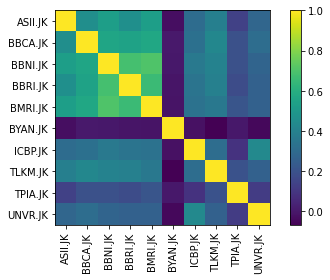

In [53]:
plotting.plot_covariance(S, plot_correlation=True)

In [54]:
market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
market_prior

ASII.JK    0.156214
BBCA.JK    0.159423
BBNI.JK    0.197295
BBRI.JK    0.202778
BMRI.JK    0.195842
BYAN.JK    0.071421
ICBP.JK    0.098792
TLKM.JK    0.130938
TPIA.JK    0.089255
UNVR.JK    0.106820
dtype: float64

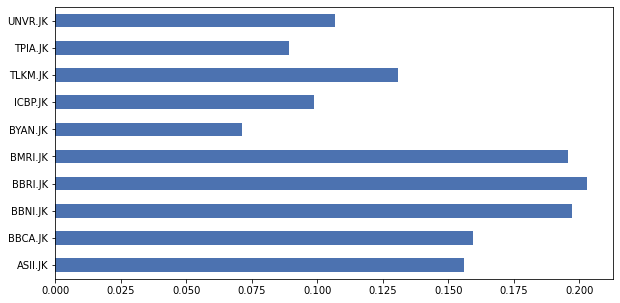

In [55]:
market_prior.plot.barh(figsize=(10,5))

# Views

In the BL method, views are specified via the matrix P (picking matrix) and the vector Q. Q contains the magnitude of each view, while P maps the views to the assets they belong to.

If you are providing absolute views (i.e a return estimate for each asset), you don't have to worry about P and Q, you can just pass your views as a dictionary.

In [56]:
# You don't have to provide views on all the assets
viewdict = {
    "BBCA.JK": 0.05,
    "BBRI.JK": 0.06,
    "BMRI.JK": 0.04,
    "BYAN.JK": 0.21,
    "TLKM.JK": 0.125,
    "TPIA.JK": -0.2,
    "BBNI.JK": -0.11,
    "UNVR.JK": 0.05,
    "ICBP.JK": 0.16
}

bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict)

Black-Litterman also allows for relative views, e.g you think asset A will outperform asset B by 10%. If you'd like to incorporate these, you will have to build P and Q yourself. An explanation for this is given in the docs.

# View confidences

In this section, we provide two ways that you may wish to construct the uncertainty matrix. The first is known as Idzorek's method. It allows you to specify a vector/list of percentage confidences.

In [57]:
confidences = [
    0.05,
    0.05,
    0.05,
    0.05,
    0.05, 
    0.05, 
    0.05, 
    0.05,
    0.05,
]

In [58]:
bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict,omega="idzorek", view_confidences=confidences)

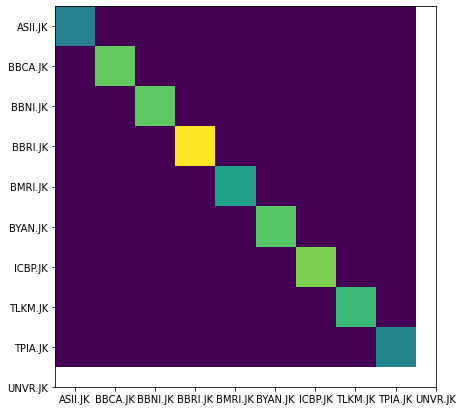

In [59]:
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(bl.omega)

# We want to show all ticks...
ax.set_xticks(np.arange(len(bl.tickers)))
ax.set_yticks(np.arange(len(bl.tickers)))

ax.set_xticklabels(bl.tickers)
ax.set_yticklabels(bl.tickers)
plt.show()

In [60]:
np.diag(bl.omega)

array([0.08318166, 0.14237776, 0.14072094, 0.18768168, 0.10726337,
       0.13811276, 0.15096665, 0.12807753, 0.08601519])

# Posterior estimates

Given the inputs, we can compute a posterior estimate of returns

In [61]:
# We are using the shortcut to automatically compute market-implied prior
bl = BlackLittermanModel(S, pi="market", market_caps=mcaps, risk_aversion=delta,
                        absolute_views=viewdict, omega=bl.omega)

In [62]:
# Posterior estimate of returns
ret_bl = bl.bl_returns()
ret_bl

ASII.JK    0.121461
BBCA.JK    0.124545
BBNI.JK    0.152056
BBRI.JK    0.161182
BMRI.JK    0.153205
BYAN.JK    0.059317
ICBP.JK    0.074045
TLKM.JK    0.100381
TPIA.JK    0.050901
UNVR.JK    0.078422
dtype: float64

In [63]:
rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)], 
             index=["Prior", "Posterior", "Views"]).T
rets_df

,Prior,Posterior,Views
ASII.JK,0.156214,0.121461,NaN
BBCA.JK,0.159423,0.124545,0.050
BBNI.JK,0.197295,0.152056,-0.110
BBRI.JK,0.202778,0.161182,0.060
BMRI.JK,0.195842,0.153205,0.040
BYAN.JK,0.071421,0.059317,0.210
ICBP.JK,0.098792,0.074045,0.160
TLKM.JK,0.130938,0.100381,0.125
TPIA.JK,0.089255,0.050901,-0.200
UNVR.JK,0.106820,0.078422,0.050


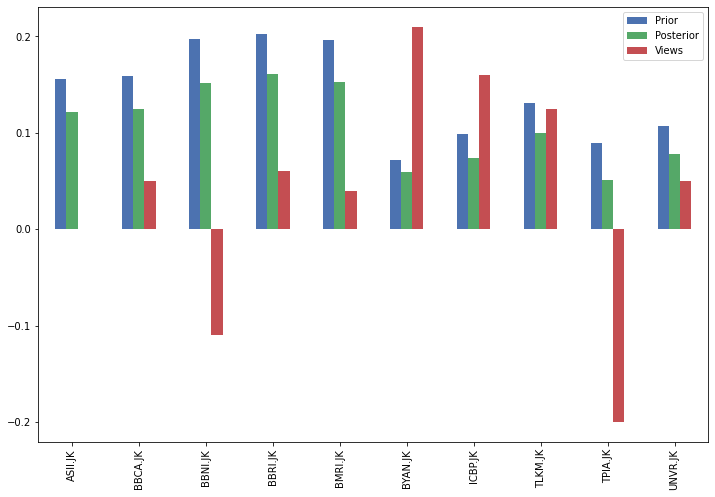

In [64]:
rets_df.plot.bar(figsize=(12,8));

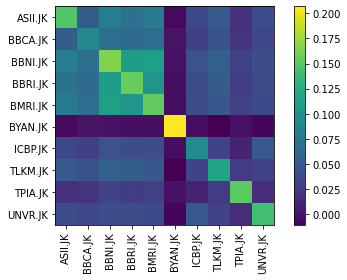

In [65]:
S_bl = bl.bl_cov()
plotting.plot_covariance(S_bl);

# Portfolio allocation

In [66]:
from pypfopt import EfficientFrontier, objective_functions

In [67]:
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()
weights

/usr/local/lib/python3.8/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:262: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


OrderedDict([('ASII.JK', 0.11124),
             ('BBCA.JK', 0.12807),
             ('BBNI.JK', 0.14541),
             ('BBRI.JK', 0.16619),
             ('BMRI.JK', 0.15183),
             ('BYAN.JK', 0.05999),
             ('ICBP.JK', 0.05671),
             ('TLKM.JK', 0.09176),
             ('TPIA.JK', 0.02729),
             ('UNVR.JK', 0.06153)])

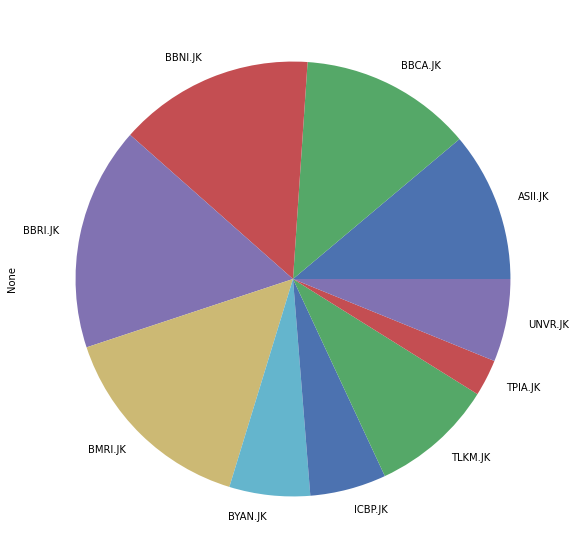

In [68]:
pd.Series(weights).plot.pie(figsize=(10,10));

In [69]:
ef.portfolio_performance(verbose=True)

Expected annual return: 12.5%
Annual volatility: 25.6%
Sharpe Ratio: 0.41


(0.12480076241221358, 0.25591082480856475, 0.4095206308315026)